WHATS GOOD I FIGURED IT OUT

Introduction

In our project, we will attempt to use the Ten Item Personality Inventory (rated on a scale of 1-7) to predict the answer to Q13: “I felt sad and depressed” from a survey based on the Taylor Manifest Anxiety Scale (TMAS). TMAS, made for adults, originally determined anxiety levels by using 50 true-or-false reflective questions that touch on various factors that contribute to anxiety; 42 questions from the Depression, Anxiety, Stress Scale (DASS) are used in this version and responses are on a scale of 1 (did not apply) to 4 (applied very much). Participants’ responses were stored in variable A (eg: Q13A), response time in E, and question’s position in I. Answers to other demographic questions and a built-in validity check (check if know definition, 3 words fake) were also included in the data. The dataset, “Predicting Depression, Anxiety, and Stress”, can be found here: https://www.kaggle.com/yamqwe/depression-anxiety-stress-scales.

Preliminary Exploratory Data Analysis

In [1]:
# import required libraries
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
#read in data and assign to dass_data

dass_data <- read_csv("dass_data.csv")
dass_data

Parsed with column specification:
cols(
  .default = col_double(),
  country = col_character(),
  major = col_character()
)

See spec(...) for full column specifications.



Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
3,7,5784,1,33,4373,4,41,3242,1,⋯,2,1,1,4,3,60,1,1,3,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
2,36,3215,2,13,7731,3,5,4156,4,⋯,2,2,3,10,1,10,2,1,4,Psychology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA
1,20,4325,1,34,4009,2,38,3604,3,⋯,2,1,1,7,2,60,2,1,4,Mechatronics engeenerieng
1,34,4796,1,9,2618,1,39,5823,1,⋯,2,1,1,2,2,60,1,1,2,Music
4,4,3470,4,14,2139,3,1,11043,4,⋯,1,1,1,12,2,70,2,1,4,Psychology


In [3]:
#split data and assign training data to dass_train

dass_split <- initial_split(dass_data, prop = 0.75, strata = Q13A)  
dass_train <- training(dass_split)   

dass_train

Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,⋯,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
4,28,3890,4,25,2122,2,16,1944,4,⋯,1,1,1,12,1,10,2,1,2,NA
4,2,8118,1,36,2890,2,35,4777,3,⋯,2,1,2,7,0,70,2,1,4,NA
2,23,5081,3,11,6837,2,37,5521,1,⋯,2,1,2,4,5,70,2,1,5,biology
2,36,3215,2,13,7731,3,5,4156,4,⋯,2,2,3,10,1,10,2,1,4,Psychology
1,18,6116,1,28,3193,2,2,12542,1,⋯,2,1,1,4,1,70,2,1,4,NA
1,20,4325,1,34,4009,2,38,3604,3,⋯,2,1,1,7,2,60,2,1,4,Mechatronics engeenerieng
1,34,4796,1,9,2618,1,39,5823,1,⋯,2,1,1,2,2,60,1,1,2,Music
4,4,3470,4,14,2139,3,1,11043,4,⋯,1,1,1,12,2,70,2,1,4,Psychology
3,38,5187,2,28,2600,4,9,2015,1,⋯,2,1,1,2,2,60,2,1,3,computer programming


In [4]:
dass_train_filtered <- select(dass_train, Q13A, TIPI1:TIPI10)
dass_train_filtered

Q13A,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,1,5,7,7,7,7,7,5,1,1
4,6,5,4,7,5,4,7,7,1,5
1,1,1,7,4,6,4,6,1,6,1
4,2,5,3,6,5,5,5,6,3,3
1,2,1,6,1,7,7,7,2,6,7
2,2,5,6,5,3,2,6,3,5,5
1,7,6,4,5,3,2,6,3,5,2
4,1,4,5,7,5,7,6,7,1,4
4,1,7,5,7,5,7,1,2,1,7


In [28]:
dass_train_f_piv <- pivot_longer(dass_train_filtered, cols = TIPI1:TIPI10, names_to = "TIPI", values_to = "TIPI_answer")
dass_train_f_piv

Q13A,TIPI,TIPI_answer
<dbl>,<chr>,<dbl>
4,TIPI1,1
4,TIPI2,5
4,TIPI3,7
4,TIPI4,7
4,TIPI5,7
4,TIPI6,7
4,TIPI7,7
4,TIPI8,5
4,TIPI9,1


In [31]:
summary_table <- dass_train_f_piv %>% 
    group_by(TIPI, TIPI_answer) %>% 
    summarize(m_Q13A = mean(Q13A), sd_Q13A = sd(Q13A), n = n())
summary_table

`summarise()` regrouping output by 'TIPI' (override with `.groups` argument)



TIPI,TIPI_answer,m_Q13A,sd_Q13A,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
TIPI1,0,2.729483,1.1274351,329
TIPI1,1,3.128694,1.0275343,4670
TIPI1,2,2.916351,1.0172105,4220
TIPI1,3,2.838533,1.0174354,3462
TIPI1,4,2.807151,1.0461598,4475
TIPI1,5,2.687253,1.0536243,6315
TIPI1,6,2.492805,1.0925928,4517
TIPI1,7,2.512737,1.1839836,1845
TIPI10,0,2.801546,1.1363379,388


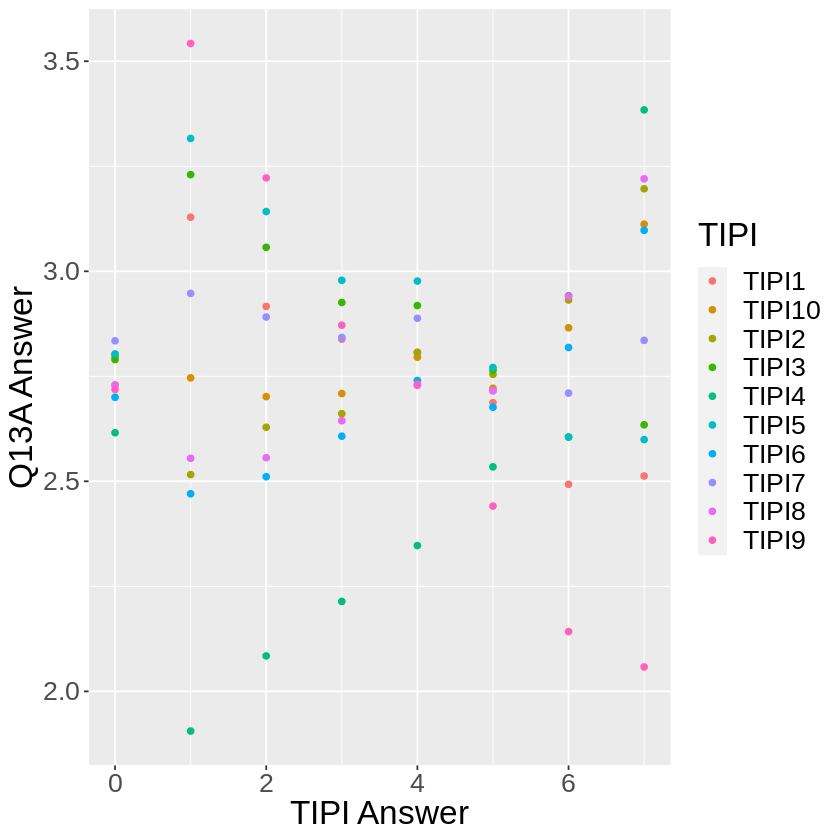

In [39]:
TIPI1_dist <- ggplot(summary_table, aes(x = TIPI_answer, y = m_Q13A)) + 
                        geom_point(aes(colour = TIPI)) +
                        labs(x = "TIPI Answer", y = "Q13A Answer") +
                        theme(text = element_text(size = 20))

TIPI1_dist

Methods

The prediction target is column Q13A and the predictors are columns [TIPI1, TIPI10]. Since both the target and predictors are numerical data, our plan is to use linear regression to build a predictive model from this data. The demographic columns [education, major] will allow for further analysis of our model by targeting specific demographic characteristics.
Since we are building a linear regression model, the model can be visualized using multiple line plots, each representing the relationship between a predictor and the target. The demographic columns can be used to group data points into different colors to yield more insight into the model.

Expected Outcomes and Significance 

From exploring this data set, we expect to find that one’s responses to the Ten Item Personality Inventory are able to predict the answer to Q13 in the questionnaire: “I felt sad and depressed”. While some items in the Personality Inventory might directly correlate with one’s feelings of sadness, we are also curious to see which unexpected items may be strong predictors to the answer of Q13. Our findings from this dataset may impact better understanding and empathizing with mental health issues such as stress, anxiety, and depression, as well as have potential as a diagnostic tool. Future questions may include: What other predictors within this data set can accurately predict the outcome of Q13? Do the answers to items on the Ten Item Personality Inventory have the ability to predict the outcomes of any other questionnaire answers?